In [1]:
#BUSINESS PROBLEM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#LOAD DATA SET
df=pd.read_csv('C:\sandeep\student record.csv')
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
5,7.55,81.18
6,6.67,76.99
7,8.99,85.46
8,5.19,70.66
9,6.75,77.82


In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.tail()

,study_hours,student_marks
35,7.31,77.59
36,6.04,72.33
37,5.11,72.08
38,6.56,77.33
39,7.53,81.67


In [5]:
df.shape

(40, 2)

In [6]:
#DISCOVER AND VISUALIZE THE DATEA TO GAIN INSIGHT
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    39 non-null     float64
 1   student_marks  40 non-null     float64
dtypes: float64(2)
memory usage: 772.0 bytes


In [7]:
df.describe()

,study_hours,student_marks
count,39.000000,40.000000
mean,6.884103,77.629750
std,1.159157,4.643849
min,5.050000,69.270000
25%,5.990000,74.600000
50%,6.730000,77.460000
75%,7.825000,81.797500
max,8.990000,85.460000


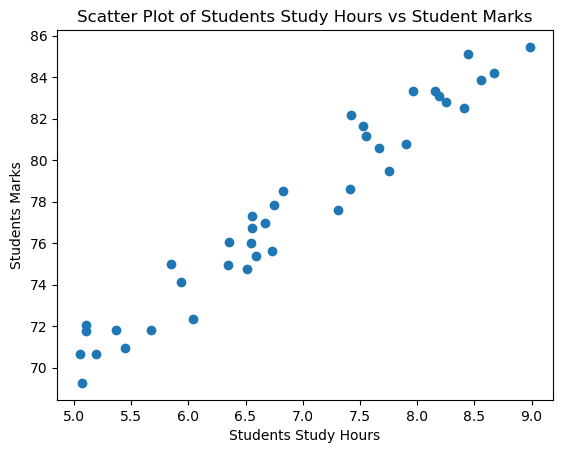

In [8]:
plt.scatter (x=df.study_hours,y=df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students Marks")
plt.title("Scatter Plot of Students Study Hours vs Student Marks")
plt.show()

In [9]:
#PREPARE THE DATA FOR MACHINE LEARNING ALOGRITHM
#DATA CLEANING
df.isnull().sum()

study_hours      1
student_marks    0
dtype: int64

In [10]:
df.mean()

study_hours       6.884103
student_marks    77.629750
dtype: float64

In [16]:
df2=df.fillna(df.mean())
df2

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.884103,78.68
3,5.670000,71.82
4,8.670000,84.19
5,7.550000,81.18
6,6.670000,76.99
7,8.990000,85.46
8,5.190000,70.66
9,6.750000,77.82


In [18]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [26]:
#SPLIT DATASET
X=df2.drop("student_marks",axis="columns")
y=df2.drop("study_hours",axis="columns")
print("shape of X=",X.shape)
print("shape of y=",y.shape)

shape of X= (40, 1)
shape of y= (40, 1)


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)
print("shape of X_train=",X_train.shape)
print("shape of y_train=",y_train.shape)
print("shape of X_test=",X_test.shape)
print("shape of y_test=",y_test.shape)

shape of X_train= (32, 1)
shape of y_train= (32, 1)
shape of X_test= (8, 1)
shape of y_test= (8, 1)


In [28]:
#SELECT A MODEL AND TRAIN IT
#y=m*x+c
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [31]:
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
lr.coef_

array([[4.01359272]])

In [33]:
lr.intercept_

array([49.78971685])

In [49]:
m=4.01
c=49.78
y=m*4+c
y

65.82

In [63]:
lr.predict([[4]])[0][0].round(2)

C:\Users\kulde\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


65.84

In [64]:
y_pred=lr.predict(X_test)
y_pred

array([[71.34270977],
       [73.26923427],
       [80.57397302],
       [70.62026308],
       [76.88146772],
       [82.54063346],
       [70.29917566],
       [79.57057484]])

In [66]:
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns = ["study_hours","student_marks_original","student_marks_predict"])

,study_hours,student_marks_original,student_marks_predict
0,5.37,71.80,71.342710
1,5.85,75.02,73.269234
2,7.67,80.58,80.573973
3,5.19,70.66,70.620263
4,6.75,77.82,76.881468
5,8.16,83.36,82.540633
6,5.11,72.08,70.299176
7,7.42,82.18,79.570575


In [67]:
#Fine-tune your model
lr.score(X_test,y_test)

0.9155495578867542

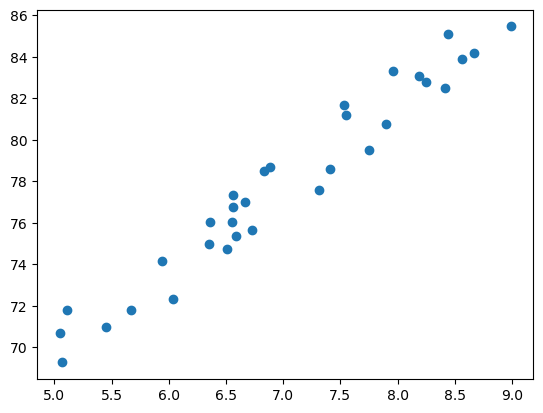

In [68]:
plt.scatter(X_train,y_train)

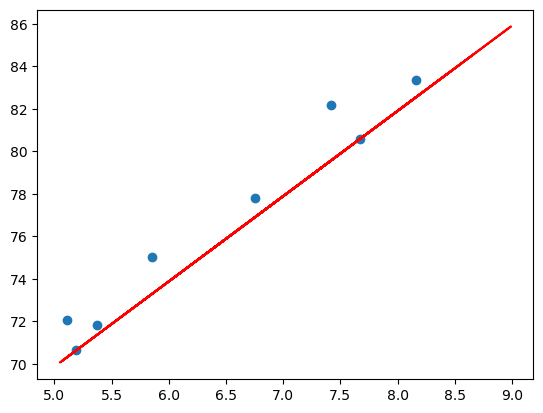

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color="r")

In [ ]:
#PRESENT YOUR SOLUTION
#SAVE ML Model
import joblib
joblib.dump(lr,"Student_mark_predictor_model.pkl")

['Student_mark_predictor_model.pkl']